In [270]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://docs.google.com/spreadsheets/d/1RYoB23f8e8TXCHx-1UhxZAGshncFn8dMFTmRklF8-Tc/edit?usp=sharing')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table cellpadding="0" cellspacing="0" class="waffle"><thead><tr><th class="row-header freezebar-origin-ltr"></th><th class="column-headers-background" id="0C0" style="width:100px;">A</th><th class="column-headers-background" id="0C1" style="width:100px;">B</th><th class="column-headers-background" id="0C2" style="width:100px;">C</th><th class="column-headers-background" id="0C4" style="width:100px;">E</th><th class="column-headers-background" id="0C5" style="width:100px;">F</th><th class="column-headers-background" id="0C6" style="width:100px;">G</th><th class="column-headers-background" id="0C7" style="width:100px;">H</th><th class="column-headers-background" id="0C8" style="width:100px;">I</th><th class="column-headers-background" id="0C9" style="width:100px;">J</th><th class="column-headers-background" id="0C10" style="width:100px;">K</th><th class="column-headers-background" id="0C11" style="width:100px;">L</th><th class="column-headers-background" id="0C12" style="width:100px;">M

In [271]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

In [272]:
def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])

[['', 'A', 'B', 'C', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], ['SEASON', 'POSITION', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['2003', '9', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['2004', '16', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['2005', '8', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['2006', '15', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['2007', '14', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['2008', '9', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['2009', '10', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],

In [273]:
';'.join(table[1])

'SEASON;POSITION;;;;;;;;;;;;;;;;;;;;;;;'

In [274]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('mancity.csv',table)

In [275]:
g = pd.read_csv('mancity.csv', delimiter=';', encoding='latin1', header=1)#reading data
g

,SEASON,POSITION,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,2003.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [276]:
g = g.iloc[0:20,[0,1]]
g

,SEASON,POSITION
0,2003.0,9.0
1,2004.0,16.0
2,2005.0,8.0
3,2006.0,15.0
4,2007.0,14.0
5,2008.0,9.0
6,2009.0,10.0
7,2010.0,5.0
8,2011.0,3.0
9,2012.0,1.0


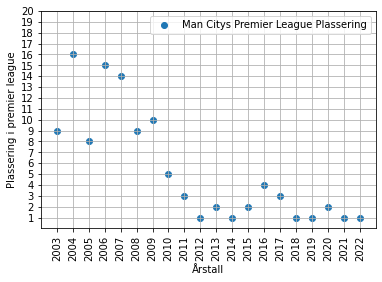

In [277]:
import numpy as np
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Plassering i premier league')
ax.set_xlabel('Årstall')

#plotting the function:
ax.scatter(g['SEASON'], g['POSITION'],  label='Man Citys Premier League Plassering')
ax.legend(loc='upper right')

plt.axis([2002, 2023, 0, 20])
plt.yticks(np.arange(1, 20 + 1, 1))
plt.xticks(np.arange(2003, 2022+1, 1))
plt.xticks(rotation=90)
plt.grid()

In [278]:
y=g['POSITION']
pd.DataFrame(y)

,POSITION
0,9.0
1,16.0
2,8.0
3,15.0
4,14.0
5,9.0
6,10.0
7,5.0
8,3.0
9,1.0


In [279]:
x=pd.DataFrame(g['SEASON'])
x['intercept']=1
x

,SEASON,intercept
0,2003.0,1
1,2004.0,1
2,2005.0,1
3,2006.0,1
4,2007.0,1
5,2008.0,1
6,2009.0,1
7,2010.0,1
8,2011.0,1
9,2012.0,1


In [280]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               POSITION   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     35.86
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           1.15e-05
Time:                        03:08:53   Log-Likelihood:                -49.543
No. Observations:                  20   AIC:                             103.1
Df Residuals:                      18   BIC:                             105.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SEASON        -0.7053      0.118     -5.988      0.0

In [281]:
res.params

SEASON         -0.705263
intercept    1424.742105
dtype: float64

In [282]:
# Tallet -0.705263 er stigningstallet til regresjonslinjen.
# I denne sammenhengen betyr det at det er en negativ korrelasjon mellom variablene 'SEASON' og 'POSITION'.
# Når x('SEASON') stiger, så blir y('POSITION') lavere.
# Dataen tolker jeg slik at Man City har fått bedre plasseringer i premier league ettersom årene har gått.
#
# Intercept viser hva y-verdien er når x-verdien er lik 0.
# På generell basis vil dette tallet vise oss hvor regresjonslinjen skjærer y-aksen.
# I dette tilfellet blir det litt krøll siden x-verdien (årstall) er kategorisert som float.
# Dermed telles x helt ned til år 0, og da vil y-aksen skjæres på ca. verdi 1425. 
# Selv om dette er logisk og matematisk korrekt blir denne infoen litt urelevant.
# Som vi ser lengre ned når jeg plotter grafen med regresjonslinjen, så tyder alt på at den vil skjære y-aksen på ca. verdi 13.

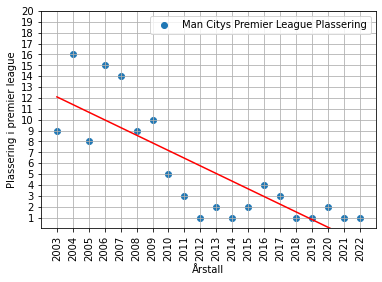

In [283]:
fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Plassering i premier league')
ax.set_xlabel('Årstall')

#plotting the function:
ax.scatter(g['SEASON'], g['POSITION'],  label='Man Citys Premier League Plassering')
ax.legend(loc='upper right')

x=np.linspace(min(g['SEASON']), max(g['SEASON']), 100)

regression_line = res.params['intercept'] + res.params['SEASON']*x

ax.plot(x, regression_line,color='red')

plt.axis([2002, 2023, 0, 20])
plt.yticks(np.arange(1, 20 + 1, 1))
plt.xticks(np.arange(2003, 2022+1, 1))
plt.xticks(rotation=90)
plt.grid()